In [1]:
# Load final Dataset 
import pandas as pd 
import numpy as np

DATA_FOLDER = '../../data'
pd.set_option('display.max_columns', None)

#Load the final dataset
df = pd.read_csv(f"{DATA_FOLDER}/processed/df_final.csv")
df.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,WikiMovieID,CharacterName,CharacterID,Instances,CharacterActorMap,ActorID,ActorName,ActorAge,ActorGender,ActorBirthDate,ActorHeight,merge_title,merge_year,movieId,title,mean,std,count
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...","Set in the second half of the 22nd century, th...",975900.0,"{1: 'Akooshay', 2: 'Lieutenant Melanie Ballard...","{1: '/m/0bgcj3x', 2: '/m/0bgchn4', 3: '/m/0bgc...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0bgchxw', 2: '/m/0jys3m', 3: '/m/0jys3...","{1: '/m/03wcfv7', 2: '/m/0346l4', 3: '/m/01vw2...","{1: 'Wanda De Jesus', 2: 'Natasha Henstridge',...","{1: 42.0, 2: 27.0, 3: 32.0, 4: 33.0, 5: 23.0, ...","{1: 'F', 2: 'F', 3: 'M', 4: 'M', 5: 'F', 6: 'F...","{1: '1958-08-26', 2: '1974-08-15', 3: '1969-06...","{1: 1.62, 2: 1.78, 3: 1.727, 4: 1.75, 5: 1.65,...",ghosts of mars,2001.0,4735.0,Ghosts of Mars (2001),2.35196,1.064942,1709.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",NaN,3196793.0,"{1: 'Police Officer', 2: 'Reporter', 3: nan, 4...","{1: '/m/0lr3z80', 2: '/m/0lr3z8g', 3: nan, 4: ...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0lr37fl', 2: '/m/0lr37d8', 3: '/m/0lr3...","{1: '/m/0h8pnlw', 2: '/m/034dbm', 3: '/m/0lr37...","{1: 'Allen Cutler', 2: 'Alice Barrett', 3: 'Ro...","{1: nan, 2: 43.0, 3: nan, 4: nan, 5: 50.0, 6: ...","{1: 'M', 2: 'F', 3: 'M', 4: 'F', 5: 'M', 6: 'M...","{1: nan, 2: '1956-12-19', 3: nan, 4: nan, 5: '...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: 1....",getting away with murder: the jonbenét ramsey ...,2000.0,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",NaN,28463795.0,"{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: '/m/0gct1bn', 2: '/m/0gct1bv', 3: '/m/0gct...","{1: '/m/053j7xf', 2: '/m/0gct1by', 3: '/m/0bwh...","{1: 'Frank Krog', 2: 'Kristin Kajander', 3: 'V...","{1: 33.0, 2: 28.0, 3: 40.0, 4: 30.0}","{1: 'M', 2: 'F', 3: 'M', 4: 'F'}","{1: '1954-10-05', 2: '1959-02-28', 3: '1947', ...","{1: nan, 2: nan, 3: nan, 4: nan}",brun bitter,1988.0,NaN,NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",A series of murders of rich young women throug...,9363483.0,"{1: nan, 2: nan}","{1: nan, 2: nan}","{1: nan, 2: nan}","{1: '/m/02t9_0c', 2: '/m/02vct27'}","{1: '/m/036496', 2: '/m/07g60h'}","{1: 'David Keith', 2: 'Cathy Moriarty'}","{1: 32.0, 2: 26.0}","{1: 'M', 2: 'F'}","{1: '1954-05-08', 2: '1960-11-29'}","{1: 1.83, 2: 1.75}",white of the eye,1987.0,90015.0,White of the Eye (1987),3.00000,1.038328,33.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'},"

Plot length statistics:
count    42253.000000
mean      1784.350555
std       1808.800601
min         99.000000
25%        508.000000
50%       1079.000000
75%       2604.000000
max      28159.000000
Name: Plot, dtype: float64


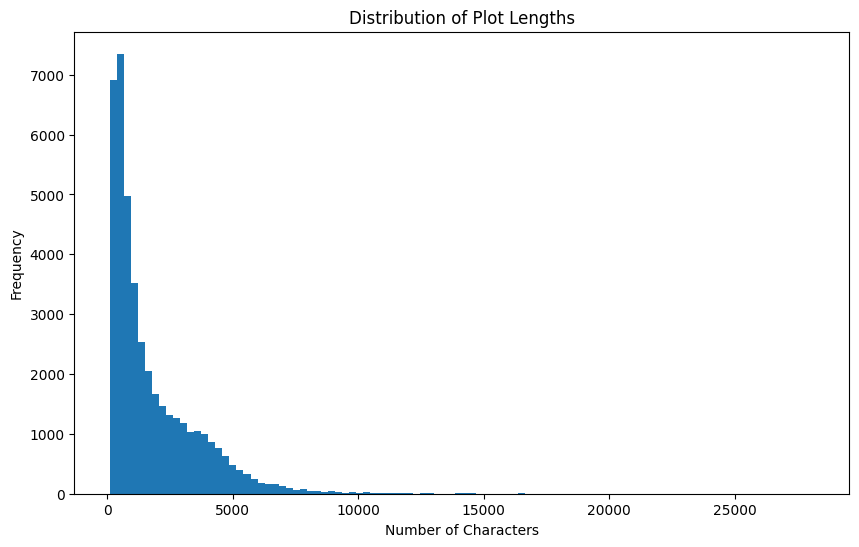

In [2]:
# Calculate plot lengths and show distribution
plot_lengths = df['Plot'].str.len().dropna()
print("Plot length statistics:")
print(plot_lengths.describe())

# Optional visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(plot_lengths, bins=100)
plt.title('Distribution of Plot Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


In [3]:
import sys
sys.path.append('../')
from utils.emotion import get_emotions_nrclex, get_emotions_roberta
# Run NRCLex on all plots and save to new column
df['nrclex_emotions'] = df['Plot'].apply(lambda x: get_emotions_nrclex(x) if pd.notna(x) else None)
# Takes about a 60s

/Users/freeman/dev/epfl/cs-401/ada-2024-project-phpjj1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/freeman/dev/epfl/cs-401/ada-2024-project-phpjj1/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


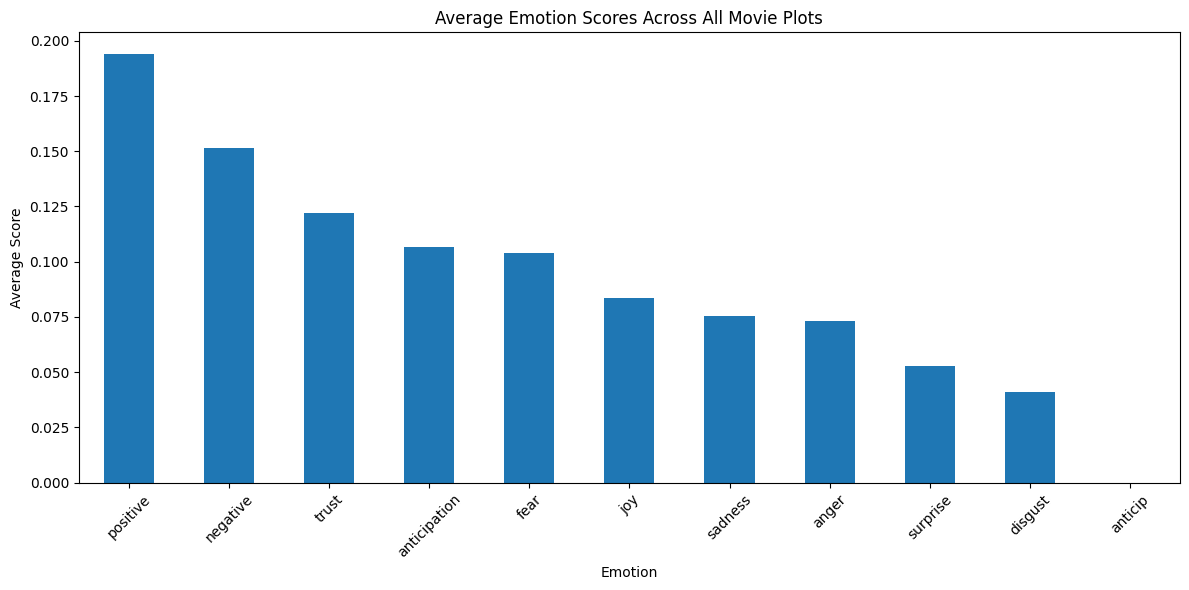

In [4]:
# Extract emotions into separate columns for plotting
emotions_df = pd.DataFrame(df['nrclex_emotions'].dropna().tolist())

# Calculate mean values
means = emotions_df.mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
means.plot(kind='bar')
plt.title('Average Emotion Scores Across All Movie Plots')
plt.xlabel('Emotion')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [5]:
import ast

def process_genre(genre_str):
    genre_dict = ast.literal_eval(genre_str)
    return list(genre_dict.values())


df['Genre_list'] = df['Genres'].apply(process_genre)

df.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,WikiMovieID,CharacterName,CharacterID,Instances,CharacterActorMap,ActorID,ActorName,ActorAge,ActorGender,ActorBirthDate,ActorHeight,merge_title,merge_year,movieId,title,mean,std,count,nrclex_emotions,Genre_list
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...","Set in the second half of the 22nd century, th...",975900.0,"{1: 'Akooshay', 2: 'Lieutenant Melanie Ballard...","{1: '/m/0bgcj3x', 2: '/m/0bgchn4', 3: '/m/0bgc...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0bgchxw', 2: '/m/0jys3m', 3: '/m/0jys3...","{1: '/m/03wcfv7', 2: '/m/0346l4', 3: '/m/01vw2...","{1: 'Wanda De Jesus', 2: 'Natasha Henstridge',...","{1: 42.0, 2: 27.0, 3: 32.0, 4: 33.0, 5: 23.0, ...","{1: 'F', 2: 'F', 3: 'M', 4: 'M', 5: 'F', 6: 'F...","{1: '1958-08-26', 2: '1974-08-15', 3: '1969-06...","{1: 1.62, 2: 1.78, 3: 1.727, 4: 1.75, 5: 1.65,...",ghosts of mars,2001.0,4735.0,Ghosts of Mars (2001),2.35196,1.064942,1709.0,"{'fear': 0.16296296296296298, 'anger': 0.13333...","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",NaN,3196793.0,"{1: 'Police Officer', 2: 'Reporter', 3: nan, 4...","{1: '/m/0lr3z80', 2: '/m/0lr3z8g', 3: nan, 4: ...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0lr37fl', 2: '/m/0lr37d8', 3: '/m/0lr3...","{1: '/m/0h8pnlw', 2: '/m/034dbm', 3: '/m/0lr37...","{1: 'Allen Cutler', 2: 'Alice Barrett', 3: 'Ro...","{1: nan, 2: 43.0, 3: nan, 4: nan, 5: 50.0, 6: ...","{1: 'M', 2: 'F', 3: 'M', 4: 'F', 5: 'M', 6: 'M...","{1: nan, 2: '1956-12-19', 3: nan, 4: nan, 5: '...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: 1....",getting away with murder: the jonbenét ramsey ...,2000.0,NaN,NaN,NaN,NaN,NaN,None,"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",NaN,28463795.0,"{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: '/m/0gct1bn', 2: '/m/0gct1bv', 3: '/m/0gct...","{1: '/m/053j7xf', 2: '/m/0gct1by', 3: '/m/0bwh...","{1: 'Frank Krog', 2: 'Kristin Kajander', 3: 'V...","{1: 33.0, 2: 28.0, 3: 40.0, 4: 30.0}","{1: 'M', 2: 'F', 3: 'M', 4: 'F'}","{1: '1954-10-05', 2: '1959-02-28', 3: '1947', ...","{1: nan, 2: nan, 3: nan, 4: nan}",brun bitter,1988.0,NaN,NaN,NaN,NaN,NaN,None,"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",A series of murders of rich young women throug...,9363483.0,"{1: nan, 2: nan}","{1: nan, 2: nan}","{1: nan, 2: nan}","{1: '/m/02t9_0c', 2: '/m/02vct27'}","{1: '/m/036496', 2: '/m/07g60h'}","{1: 'David Keith', 2: 'Cathy Moriarty'}","{1: 32.0, 2: 26.0}","{1: 'M', 2: 'F'}","{1: '1954-05-08', 2: '1960-11-29'}","{1: 1.83, 2: 1.75}",white of the eye,1987.0,90015.0,White of the Eye (1987),3.00000,1.038328,33.0,"{'fear': 0.175141

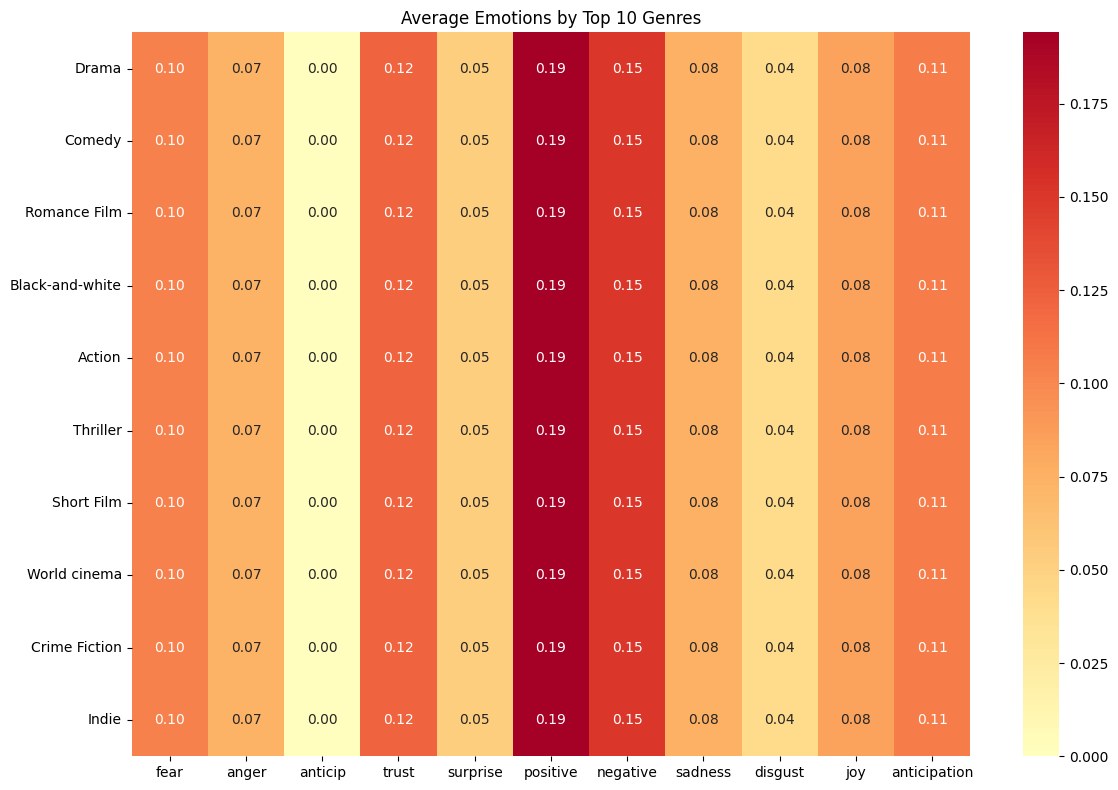

In [6]:
# Get list of all genres
def plot_top_genres(emotions_col: str):
    import seaborn as sns

    all_genres = []
    for genres in df['Genre_list'].dropna():
        all_genres.extend(genres)

    # Get 10 most common genres
    top_10_genres = pd.Series(all_genres).value_counts().head(10).index

    # Filter movies by top genres and get their emotions
    genre_emotions = {}
    for genre in top_10_genres:
        genre_emotions_list = df[emotions_col].dropna().tolist()
        genre_emotions[genre] = pd.DataFrame(genre_emotions_list).mean()

    # Convert to DataFrame for plotting
    genre_emotions_df = pd.DataFrame(genre_emotions).T

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(genre_emotions_df, cmap='RdYlBu_r', center=0, annot=True, fmt='.2f')
    plt.title('Average Emotions by Top 10 Genres')
    plt.tight_layout()
    plt.show()

plot_top_genres('nrclex_emotions')
# Obviously, it doesn't really make sense to run it on the entire plot...

In [7]:
# Let's look at the ending of each plots instead of all of them by taking the last 3 sentences.
# Ignore Nans

def get_ending(plot: str):
    sentences = plot.split('.')
    if len(sentences) < 3:
        return np.nan # not enough sentences to get ending
    return '. '.join(sentences[-3:])

# Get endings for each plot
df['ending'] = df['Plot'].apply(lambda x: get_ending(x) if pd.notna(x) else None)




In [8]:
# Let's look at endings
df['ending_nrclex'] = df['ending'].apply(lambda x: get_emotions_nrclex(x) if pd.notna(x) else None)
df.head()



,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,WikiMovieID,CharacterName,CharacterID,Instances,CharacterActorMap,ActorID,ActorName,ActorAge,ActorGender,ActorBirthDate,ActorHeight,merge_title,merge_year,movieId,title,mean,std,count,nrclex_emotions,Genre_list,ending,ending_nrclex
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...","Set in the second half of the 22nd century, th...",975900.0,"{1: 'Akooshay', 2: 'Lieutenant Melanie Ballard...","{1: '/m/0bgcj3x', 2: '/m/0bgchn4', 3: '/m/0bgc...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0bgchxw', 2: '/m/0jys3m', 3: '/m/0jys3...","{1: '/m/03wcfv7', 2: '/m/0346l4', 3: '/m/01vw2...","{1: 'Wanda De Jesus', 2: 'Natasha Henstridge',...","{1: 42.0, 2: 27.0, 3: 32.0, 4: 33.0, 5: 23.0, ...","{1: 'F', 2: 'F', 3: 'M', 4: 'M', 5: 'F', 6: 'F...","{1: '1958-08-26', 2: '1974-08-15', 3: '1969-06...","{1: 1.62, 2: 1.78, 3: 1.727, 4: 1.75, 5: 1.65,...",ghosts of mars,2001.0,4735.0,Ghosts of Mars (2001),2.35196,1.064942,1709.0,"{'fear': 0.16296296296296298, 'anger': 0.13333...","[Thriller, Science Fiction, Horror, Adventure,...","While Ballard recuperates at a hospital, the ...","{'fear': 0.21739130434782608, 'anger': 0.17391..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",NaN,3196793.0,"{1: 'Police Officer', 2: 'Reporter', 3: nan, 4...","{1: '/m/0lr3z80', 2: '/m/0lr3z8g', 3: nan, 4: ...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0lr37fl', 2: '/m/0lr37d8', 3: '/m/0lr3...","{1: '/m/0h8pnlw', 2: '/m/034dbm', 3: '/m/0lr37...","{1: 'Allen Cutler', 2: 'Alice Barrett', 3: 'Ro...","{1: nan, 2: 43.0, 3: nan, 4: nan, 5: 50.0, 6: ...","{1: 'M', 2: 'F', 3: 'M', 4: 'F', 5: 'M', 6: 'M...","{1: nan, 2: '1956-12-19', 3: nan, 4: nan, 5: '...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: 1....",getting away with murder: the jonbenét ramsey ...,2000.0,NaN,NaN,NaN,NaN,NaN,None,"[Mystery, Biographical film, Drama, Crime Drama]",None,None
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",NaN,28463795.0,"{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: '/m/0gct1bn', 2: '/m/0gct1bv', 3: '/m/0gct...","{1: '/m/053j7xf', 2: '/m/0gct1by', 3: '/m/0bwh...","{1: 'Frank Krog', 2: 'Kristin Kajander', 3: 'V...","{1: 33.0, 2: 28.0, 3: 40.0, 4: 30.0}","{1: 'M', 2: 'F', 3: 'M', 4: 'F'}","{1: '1954-10-05', 2: '1959-02-28', 3: '1947', ...","{1: nan, 2: nan, 3: nan, 4: nan}",brun bitter,1988.0,NaN,NaN,NaN,NaN,NaN,None,"[Crime Fiction, Drama]",None,None
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",A series of murders of rich young women throug...,9363483.0,"{1: nan, 2: nan}","{1: nan, 2: nan}","{1: nan, 2: nan}","{1: '/m/02t9_0c', 2: '/m/02vct27'}","{1: '/m/036496', 2: '/m/07g60h'}","{1: 'David Keith', 2: 'Cathy Moriarty'}","{1: 32.0, 2: 26.0}","{1: 'M', 2: 'F'}","{1: '1954

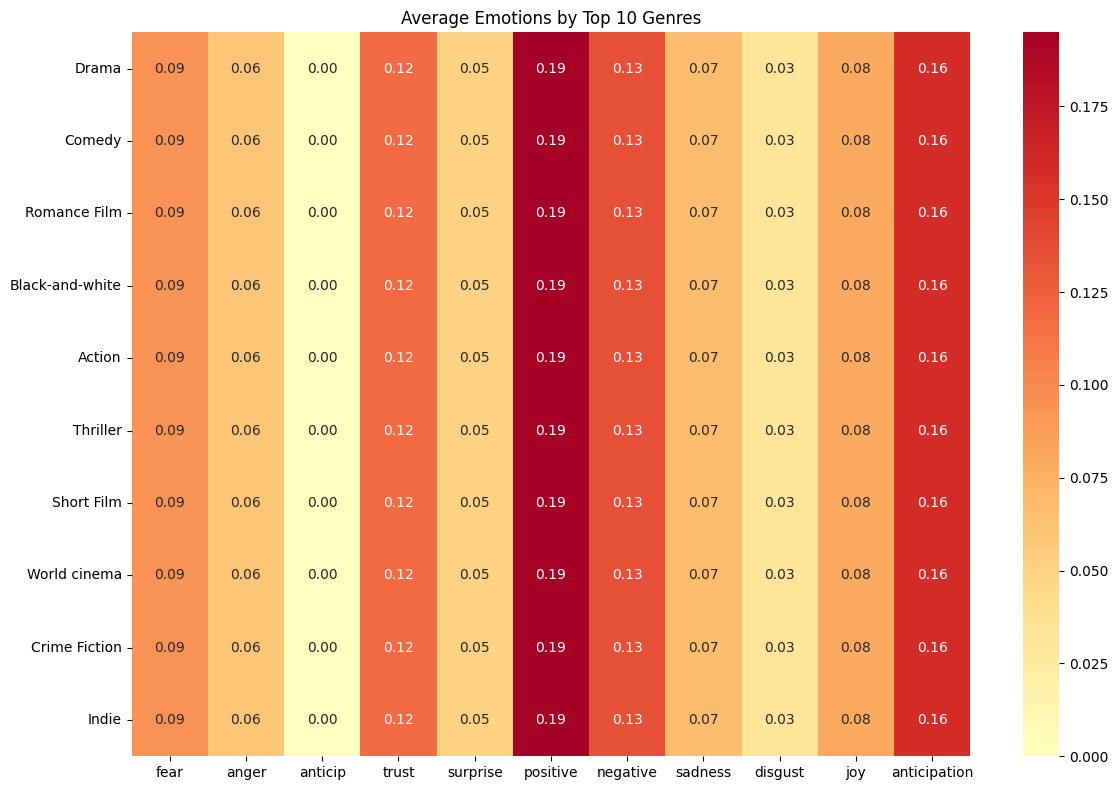

In [9]:
# Lets do the plots again but for the endings
plot_top_genres('ending_nrclex')

# OK... it  still looks pretty unusable

In [63]:
# Try with roberta in batches
batch_size = 10
total_rows = len(df)

# Create empty results dataframe
results_df = pd.DataFrame(columns=['WikiID', 'emotions'])
results_path = f'{DATA_FOLDER}/processed/ending_emotions_roberta.csv'

n_chunks = (total_rows + batch_size - 1) // batch_size  # make sure we have enough batches
chunked_endings = np.array_split(df['ending'], n_chunks)

# chunked_endings = np.array_split(df['ending'], batch_size)

for i, chunk in enumerate(chunked_endings):
    print(f"Processing chunk {i}/{len(chunked_endings)} ({batch_size * i} / {total_rows}) - {(batch_size * i / total_rows * 100):.1f}%")
    
    chunk_results = []
    chunk_ids = []
    
    for ending, wiki_id in zip(chunk, df['WikiID'].iloc[batch_size*i:batch_size*(i+1)]):
        if pd.isna(ending):
            chunk_results.append(pd.NA)
        else:
            text = ending[-300:] # take the last 300 characters
            chunk_results.append(get_emotions_roberta(text))
        chunk_ids.append(wiki_id)
            
    # Add chunk results to dataframe
    chunk_df = pd.DataFrame({
        'WikiID': chunk_ids,
        'emotions': chunk_results
    })
    results_df = pd.concat([results_df, chunk_df])
    
    # Save incrementally
    results_df.to_csv(results_path, index=False)

print(f"Saved to {results_path}")

/Users/freeman/dev/epfl/cs-401/ada-2024-project-phpjj1/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Processing chunk 0/8181 (0 / 81809) - 0.0%
Processing chunk 1/8181 (10 / 81809) - 0.0%
Processing chunk 2/8181 (20 / 81809) - 0.0%
Processing chunk 3/8181 (30 / 81809) - 0.0%
Processing chunk 4/8181 (40 / 81809) - 0.0%
Processing chunk 5/8181 (50 / 81809) - 0.1%
Processing chunk 6/8181 (60 / 81809) - 0.1%
Processing chunk 7/8181 (70 / 81809) - 0.1%
Processing chunk 8/8181 (80 / 81809) - 0.1%
Processing chunk 9/8181 (90 / 81809) - 0.1%
Processing chunk 10/8181 (100 / 81809) - 0.1%
Processing chunk 11/8181 (110 / 81809) - 0.1%
Processing chunk 12/8181 (120 / 81809) - 0.1%
Processing chunk 13/8181 (130 / 81809) - 0.2%
Processing chunk 14/8181 (140 / 81809) - 0.2%
Processing chunk 15/8181 (150 / 81809) - 0.2%
Processing chunk 16/8181 (160 / 81809) - 0.2%
Processing chunk 17/8181 (170 / 81809) - 0.2%
Processing chunk 18/8181 (180 / 81809) - 0.2%
Processing chunk 19/8181 (190 / 81809) - 0.2%
Processing chunk 20/8181 (200 / 81809) - 0.2%
Processing chunk 21/8181 (210 / 81809) - 0.3%
Processin

KeyboardInterrupt: 

In [67]:
final = pd.read_csv(results_path)
final[:-200]

,WikiID,emotions
0,975900,"{'neutral': 0.8508015275001526, 'approval': 0...."
1,3196793,NaN
2,28463795,NaN
3,9363483,"{'neutral': 0.8816454410552979, 'realization':..."
4,261236,"{'neutral': 0.9097065925598145, 'approval': 0...."
...,...,...
285,34689049,NaN
286,36542079,NaN
287,4069274,"{'neutral': 0.767368733882904, 'annoyance': 0...."
288,1643787,"{'neutral': 0.9099482297897339, 'realization':..."


"Bryan meets a man called Bill in a bar. They go back to Bryan's home and have unprotected sex. Later, they wake up and talk. Bryan discovers that Bill's real name is Brian, and that he is bisexual. They spend hours talking, covering topics including AIDS, sexuality, feminism, role-play and Emily Dickinson.<ref name Canby | first  Vincent Canby | title  New York Times | date http://query.nytimes.com/gst/fullpage.html?res2008-03-05 }}"